# Dimensionality Reduction

In statistics, machine learning, and information theory, dimensionality reduction or dimension reduction is the process of reducing the number of random variables under consideration by obtaining a set of principal variables (source [Wikipedia](https://en.wikipedia.org/wiki/Dimensionality_reduction)).

## Principle Component Analysis (PCA)

PCA is defined as an orthogonal linear transformation that transforms data into a new coordinate system such that the greatest variance by some scalar projection of the data comes to lie on the first coordinate (called the first principle component), the second variance on the second coordinate, etc.

In [1]:
import sys
import numpy as np
import pandas as pd
sys.path.insert(0,"../")
# our main import
import turbopanda as turb

import matplotlib.pyplot as plt
%matplotlib inline

print("turbopanda: %s" % turb.__version__)

turbopanda: 0.2.6


## Example: Using simulated data

`scikit-learn` provides a host of utility functions for generating simulated data to test machine learning functions on:

In [2]:
from sklearn.datasets import make_low_rank_matrix
from sklearn.decomposition import PCA

In [16]:
X = make_low_rank_matrix(100, 300, effective_rank=5, tail_strength=.4)

## Making a model

It's as easy as passing in the numpy array into `.fit` method. The function returns the `sklearn.PCA` object for downstream custom analyses:

In [13]:
model = turb.ml.fit.pca(X)
model

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

## With plotting

Various plots can be associated with the `plot` parameter when fitting a PCA model to be automatically displayed:

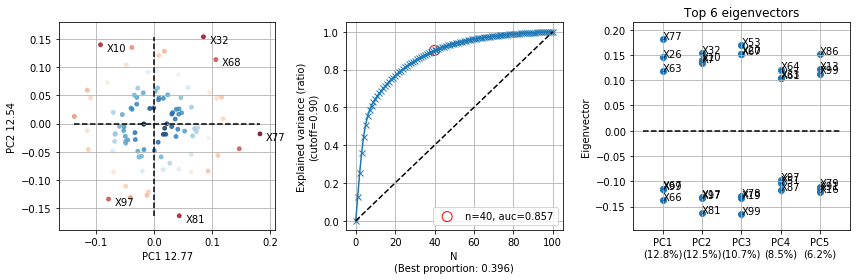

In [14]:
_ = turb.ml.fit.pca(X, plot=True)

## Preprocessing as an option

By default, values are scaled using *z-score* standardization and cleaned, such as dropping missing values, checking data types to keep only float columns, etc. This can be switched off if you know the data is already clean.

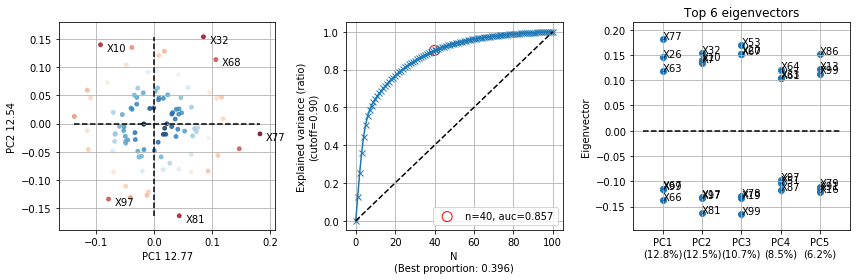

In [15]:
_ = turb.ml.fit.pca(X, preprocess=False, plot=True)

## Integrated with `pandas`: Using labels

All the examples we've shown so far use numpy arrays, but you can glean useful information if you pass a MetaPanda or `pandas.DataFrame` object:

In [54]:
X2_numpy = np.hstack((
    make_low_rank_matrix(200, 20, effective_rank=1, tail_strength=.2),
    make_low_rank_matrix(200, 20, effective_rank=1, tail_strength=.1)
))
X2 = pd.DataFrame(X2_numpy, columns=turb.str.patproduct("%s%d", ("Xrep1", "Ztest2"), range(20)))

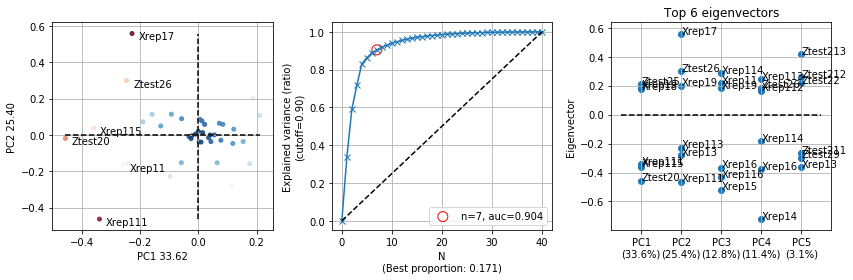

In [52]:
model2 = turb.ml.fit.pca(X2, preprocess=True, plot=True)

## Selecting subsets of the input

There could be many cases where we are dealing with a dataset with categorical data or joined-together data from different sources. In this case we would want to select a subset of $X$ to draw our dimensionality reduction model from. This can be specified using the `x` selector argument:

In [ ]:
# model3 = turb.ml.fit.pca(X2, x="Xrep1[0-9]+", preprocess=True, plot=True)
# to implement